In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
# white grid background for visualization
sns.set_style("whitegrid")

In [3]:
%matplotlib inline

In [4]:
from pandas_datareader import data as pdr
import yfinance as yf

In [5]:
# define a custom function to fetch data using yahoo finance

def custom_get_data_yf(*args,**kwargs):
    return yf.download(*args, **kwargs)

In [6]:
# override pandas_datareader with customer function
pdr.get_data_yahoo = custom_get_data_yf

In [7]:
# import datetime to set the start and end date of the graph
from datetime import datetime as dt

In [8]:
tech_list = ["NVDA", "GOOG", "AMZN", "META"]

In [9]:
end = dt.now()

In [10]:
end

datetime.datetime(2025, 7, 6, 9, 34, 42, 703014)

In [11]:
start = dt( end.year - 1, end.month, end.day)   #1 year ago from today

In [12]:
start

datetime.datetime(2024, 7, 6, 0, 0)

In [13]:
# to get adjusted closing price

for stock in tech_list:
    globals()[stock] = pdr.get_data_yahoo(stock, start,end, auto_adjust = False) 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [16]:
tech_list

['NVDA', 'GOOG', 'AMZN', 'META']

In [19]:
# 1: NVDA 
NVDA.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,,
2024-07-08,128.159500,128.199997,130.770004,127.040001,127.489998,237677300
2024-07-09,131.338516,131.380005,133.820007,128.649994,130.350006,285366600
2024-07-10,134.867401,134.910004,135.100006,132.419998,134.029999,248978600
2024-07-11,127.359764,127.400002,136.149994,127.050003,135.750000,374782700
2024-07-12,129.199203,129.240005,131.919998,127.220001,128.259995,252680500


In [20]:
NVDA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2024-07-08 to 2025-07-03
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, NVDA)  249 non-null    float64
 1   (Close, NVDA)      249 non-null    float64
 2   (High, NVDA)       249 non-null    float64
 3   (Low, NVDA)        249 non-null    float64
 4   (Open, NVDA)       249 non-null    float64
 5   (Volume, NVDA)     249 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.6 KB


In [21]:
# 2: GOOG 
GOOG.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,,
2024-07-08,189.569916,190.479996,191.679001,189.320007,191.365005,12097600
2024-07-09,189.530121,190.440002,192.860001,190.229996,191.750000,10198500
2024-07-10,191.739517,192.660004,193.309998,190.619995,190.750000,12052900
2024-07-11,186.405121,187.300003,192.410004,186.820007,191.339996,16452000
2024-07-12,185.887604,186.779999,188.690002,186.139999,186.919998,14449100


# Data Info

In [22]:
NVDA["Adj Close"].plot(legend = True, figsize = (10,4))

<Axes: xlabel='Date'>

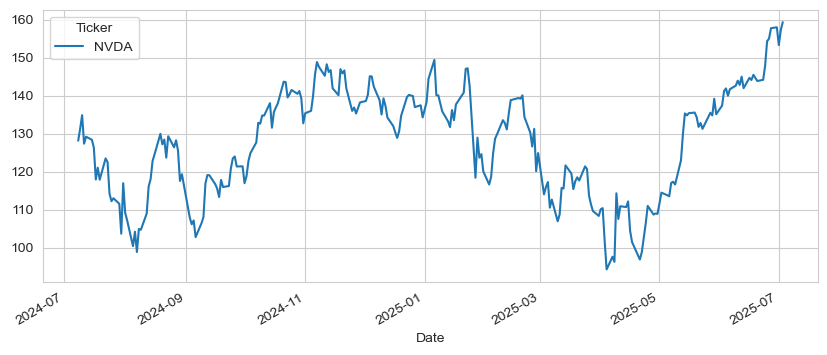

In [23]:
plt.show()

In [30]:
# I will make function to plot all adjusted closed prices of these 4 stocks
def plot_ty(stock):
    return stock["Adj Close"].plot(legend = True, figsize = (10,4))


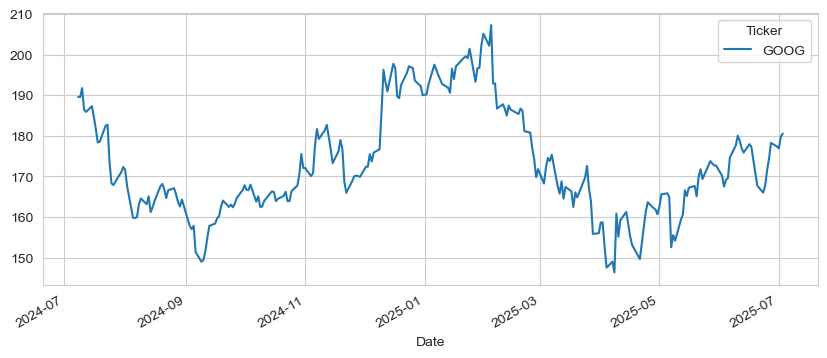

In [33]:
plot_ty(GOOG)
plt.show()

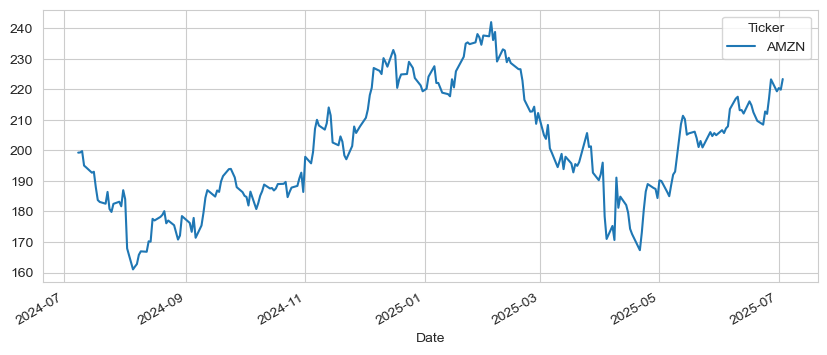

In [36]:
plot_ty(AMZN)
plt.show()

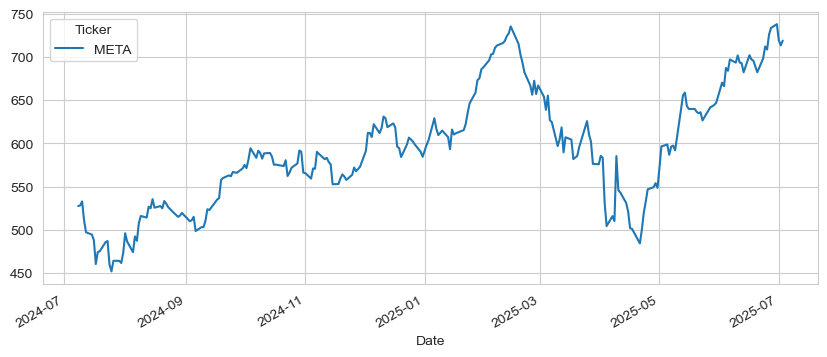

In [37]:
plot_ty(META)
plt.show()

In [38]:
# plot the total volumne of stocks trading

In [39]:
NVDA["Volume"].plot(legend = True, figsize = (10,4))

<Axes: xlabel='Date'>

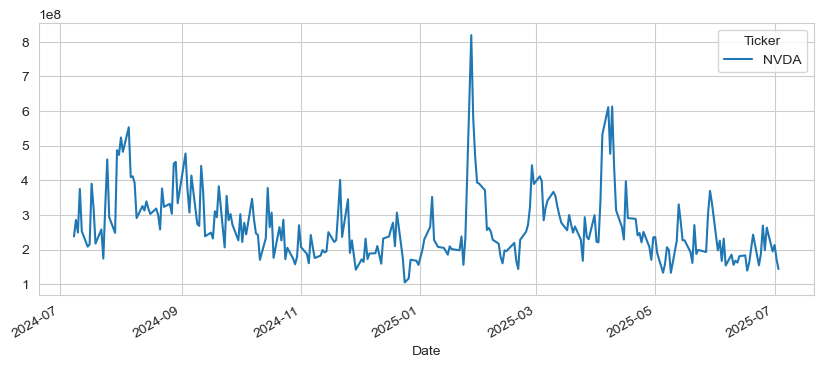

In [40]:
plt.show()

# Moving Average and Daily Return Analysis

In [41]:
MA_day = [10,20,50]

In [42]:
for MA in MA_day:
    # create a columne's name and label it
    column_name = f"MA{str(MA)}"
    
    # create a new colume here in NVDA dataframe
    NVDA[column_name] = NVDA["Adj Close"].rolling(MA).mean()

In [43]:
NVDA[["Adj Close", "MA10", "MA20", "MA50"]].plot(subplots = False,figsize = (10,4))
                                                                                                                   

<Axes: xlabel='Date'>

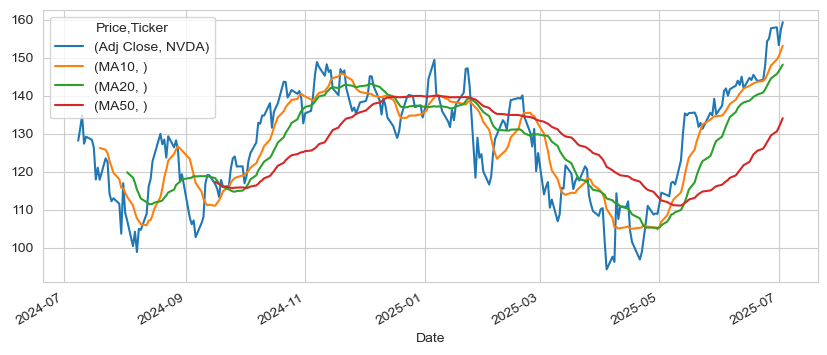

In [44]:
plt.show()

In [48]:
# we notice that you will get smoother line for our moving average if you get more days to calculate

In [45]:
# I am investing a lot on NVDA, therefore I will focus on analysing this stock

In [46]:
                                                    # Daily Return

In [47]:
# remember periods = 1 to calculate the daily return rate

In [49]:
NVDA["Daily Return Rate"] = NVDA["Adj Close"].pct_change(periods = 1) 

In [50]:
NVDA["Daily Return Rate"]

Date
2024-07-08         NaN
2024-07-09    0.024805
2024-07-10    0.026869
2024-07-11   -0.055667
2024-07-12    0.014443
                ...   
2025-06-27    0.017611
2025-06-30    0.001521
2025-07-01   -0.029685
2025-07-02    0.025766
2025-07-03    0.013291
Name: Daily Return Rate, Length: 249, dtype: float64

In [53]:
NVDA.tail(50)

Price,Adj Close,Close,High,Low,Open,Volume,MA10,MA20,MA50,Daily Return Rate
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA,,,,
Date,,,,,,,,,,
2025-04-23,102.702866,102.709999,104.800003,102.019997,104.519997,247526000,106.015636,105.697160,116.162314,0.038629
2025-04-24,106.422607,106.430000,106.540001,103.110001,103.480003,220815000,105.225691,105.330685,115.635195,0.036218
2025-04-25,111.002296,111.010002,111.919998,105.730003,106.849998,251064700,105.569668,105.309686,115.232864,0.043033
2025-04-28,108.722450,108.730003,110.370003,106.019997,109.690002,207708500,105.349683,105.262690,114.701950,-0.020539
2025-04-29,109.012428,109.019997,110.199997,107.440002,107.669998,170444300,105.180695,105.294687,114.105647,0.002667
2025-04-30,108.912437,108.919998,108.919998,104.080002,104.470001,235044600,104.852718,105.233192,113.496346,-0.000917
2025-05-01,111.602249,111.610001,114.940002,111.300003,113.080002,236121500,105.564669,105.292688,112.944240,0.024697
2025-05-02,114.492050,114.500000,115.400002,113.370003,114.180000,190194800,106.865579,105.927644,112.432333,0.025894


In [54]:
NVDA["Daily Return Rate"].plot(figsize = (20,8), legend = True, marker = "o")

<Axes: xlabel='Date'>

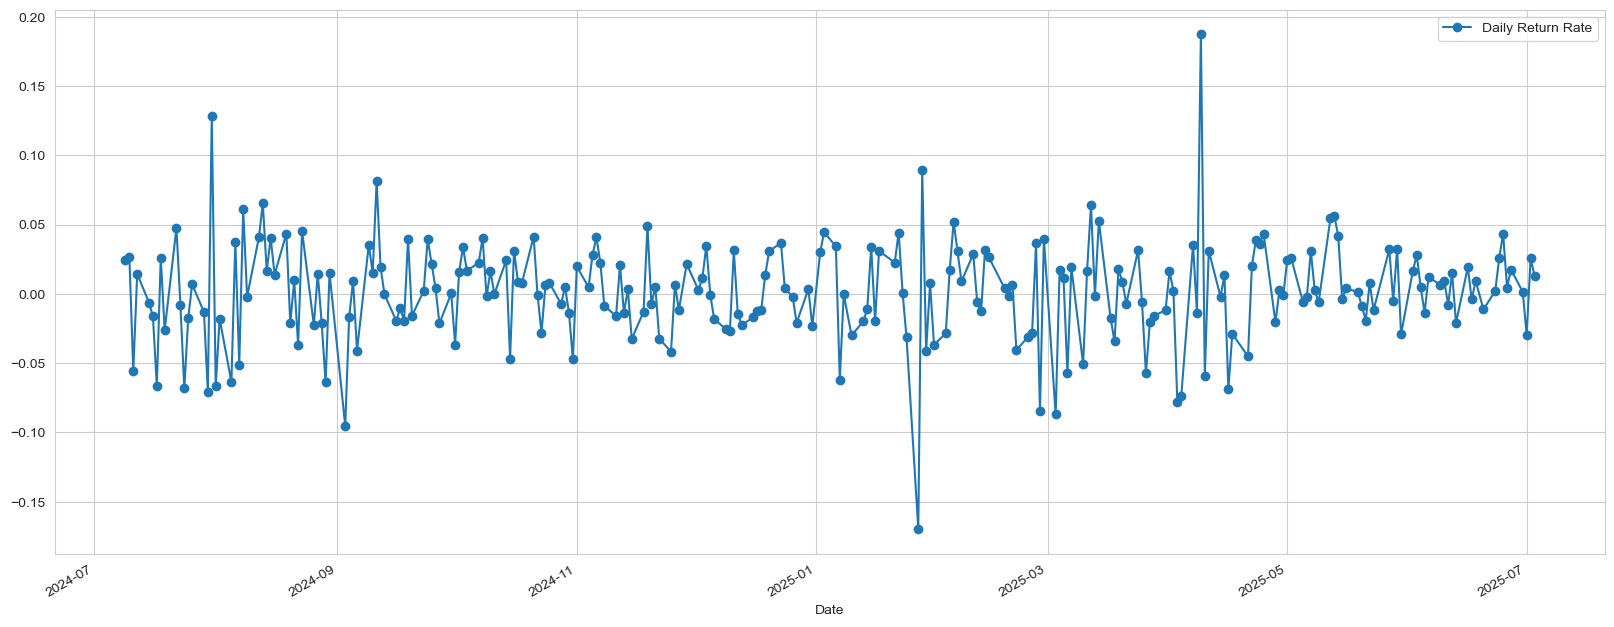

In [55]:
plt.show()

In [56]:
sns.lmplot(data = NVDA, y = "Adj Close", x = "Volume")

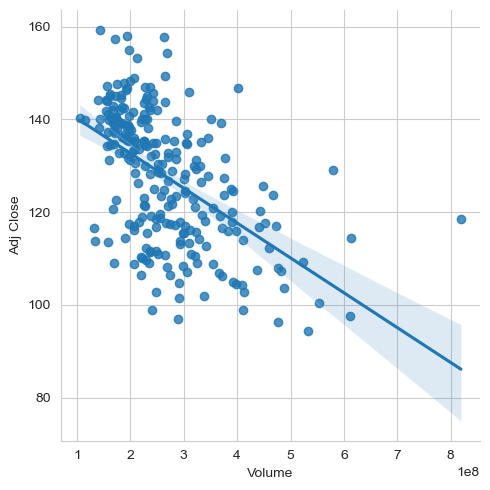

In [57]:
plt.show()

In [58]:
# we can notice that there is a negative relationship between Adj Price and Volume of stock trade during 1 year period

# There are lots of trading with small volume has been recorded when the price was at peak. It indicates the negative relationship between 2 categories

# Due to market uncertainty with the tariff going between US - China. However I believe it will bounce back soon with the rise of AI developement

In [60]:
# average daily return with histogram

In [59]:
sns.displot(data = NVDA["Daily Return Rate"].dropna(), bins = 50, color = "purple", kde = True)

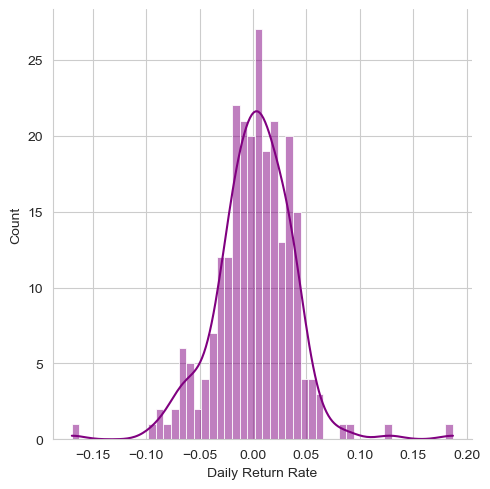

In [61]:
plt.show()

In [62]:
# This graph shows the distribution of daily return of NVDA, we can see that it was coming from - 0.1 to 0.1 percents

In [63]:
# Analyse the return of all the stock in the list

In [67]:
# create a dataframe contains only "adj close" of each stock 

In [65]:
techy_df = pdr.get_data_yahoo(tech_list, start, end, auto_adjust = False)["Adj Close"]

[*********************100%***********************]  4 of 4 completed


In [66]:
techy_df.head(10)

Ticker,AMZN,GOOG,META,NVDA
Date,,,,
2024-07-08,199.289993,189.569916,527.513733,128.159515
2024-07-09,199.339996,189.530106,528.191406,131.338516
2024-07-10,199.789993,191.739502,532.865417,134.867401
2024-07-11,195.050003,186.405121,510.950500,127.359772
2024-07-12,194.490005,185.887619,497.167633,129.199188
2024-07-15,192.720001,187.290863,494.466888,128.399445
2024-07-16,193.020004,184.613708,488.118652,126.320099
2024-07-17,187.929993,181.747467,460.413483,117.952744
2024-07-18,183.750000,178.363739,474.226196,121.051758


In [68]:
tech_returns = techy_df.pct_change(periods = 1)

In [70]:
tech_returns.head(10)

Ticker,AMZN,GOOG,META,NVDA
Date,,,,
2024-07-08,NaN,NaN,NaN,NaN
2024-07-09,0.000251,-0.000210,0.001285,0.024805
2024-07-10,0.002257,0.011657,0.008849,0.026869
2024-07-11,-0.023725,-0.027821,-0.041127,-0.055667
2024-07-12,-0.002871,-0.002776,-0.026975,0.014443
2024-07-15,-0.009101,0.007549,-0.005432,-0.006190
2024-07-16,0.001557,-0.014294,-0.012839,-0.016194
2024-07-17,-0.026370,-0.015526,-0.056759,-0.066239
2024-07-18,-0.022242,-0.018618,0.030001,0.026273


In [71]:
# Compare daily return percentages of 2 stocks, check their correlation, using jointplot

In [72]:
sns.jointplot(data = tech_returns, x = "NVDA", y = "GOOG", kind ="reg", color = "green")

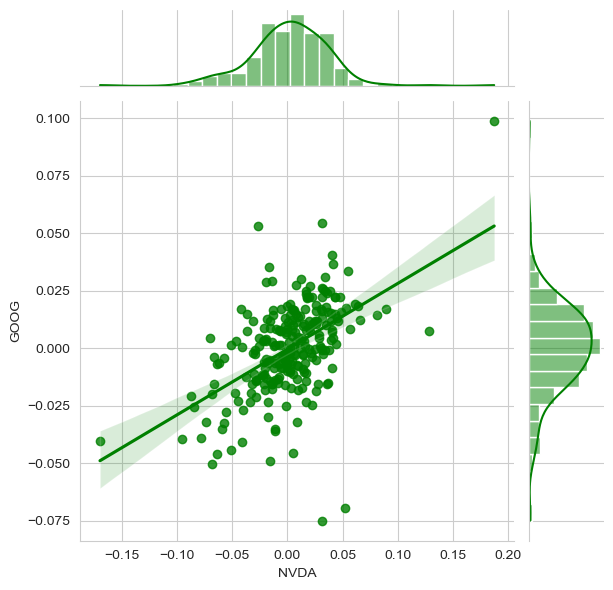

In [73]:
plt.show()

In [74]:
sns.jointplot(data = tech_returns, x = "GOOG", y = "AMZN", kind ="reg", color = "blue")

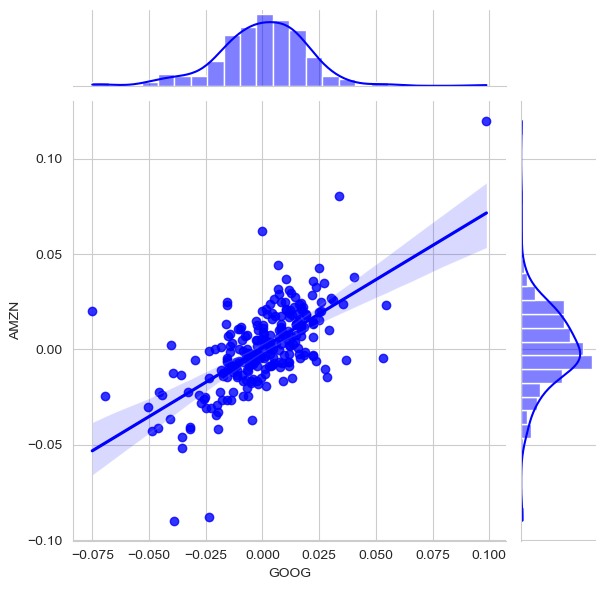

In [75]:
plt.show()

In [76]:
sns.jointplot(data = tech_returns, x = "NVDA", y = "META", kind ="reg", color = "blue")

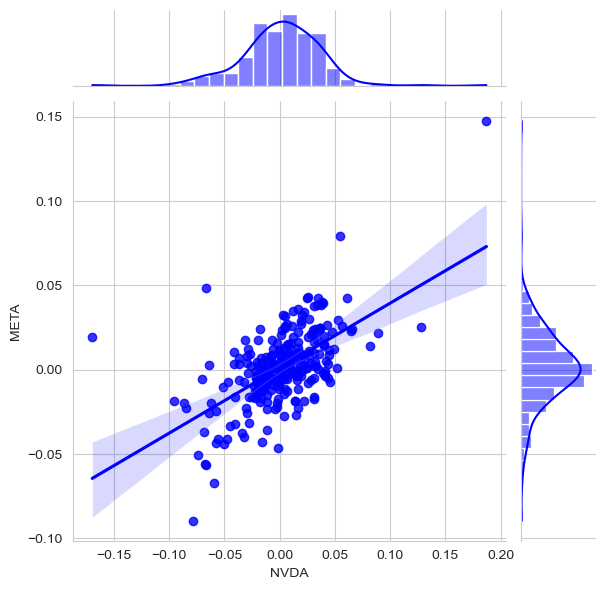

In [78]:
plt.show()

In [92]:
                        # I want to check this NVDA stock, compared with SP500

In [86]:
SP500 = pdr.get_data_yahoo(["^GSPC"], start,end, auto_adjust = False)

[*********************100%***********************]  1 of 1 completed


In [90]:
SP500_return = SP500["Adj Close"].pct_change(periods = 1)

In [91]:
SP500_return

Ticker,^GSPC
Date,
2024-07-08,NaN
2024-07-09,0.000741
2024-07-10,0.010208
2024-07-11,-0.008763
2024-07-12,0.005517
...,...
2025-06-27,0.005219
2025-06-30,0.005164
2025-07-01,-0.001119


In [94]:
return_101 = pd.concat([tech_returns,SP500_return], axis = 1)

In [95]:
return_101

Ticker,AMZN,GOOG,META,NVDA,^GSPC
Date,,,,,
2024-07-08,NaN,NaN,NaN,NaN,NaN
2024-07-09,0.000251,-0.000210,0.001285,0.024805,0.000741
2024-07-10,0.002257,0.011657,0.008849,0.026869,0.010208
2024-07-11,-0.023725,-0.027821,-0.041127,-0.055667,-0.008763
2024-07-12,-0.002871,-0.002776,-0.026975,0.014443,0.005517
...,...,...,...,...,...
2025-06-27,0.028464,0.022015,0.010384,0.017611,0.005219
2025-06-30,-0.017510,-0.004936,0.006079,0.001521,0.005164
2025-07-01,0.004877,-0.002706,-0.025566,-0.029685,-0.001119


In [96]:
sns.jointplot(data = return_101, x = "NVDA", y = "^GSPC", kind ="reg", color = "blue")

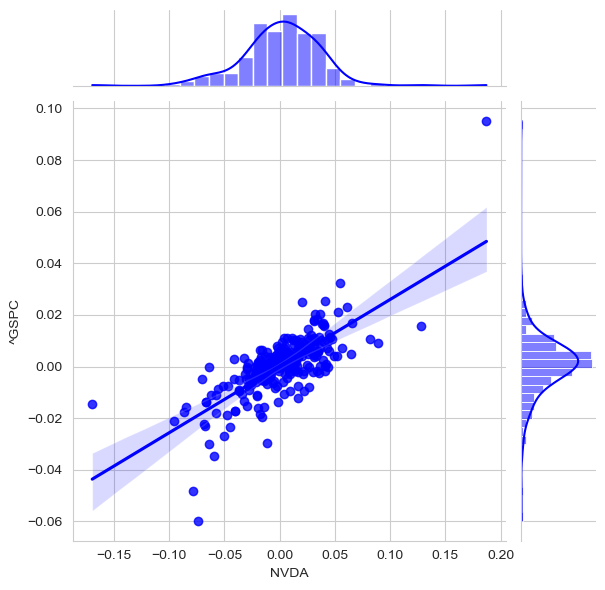

In [97]:
plt.show()

In [77]:
# Seaborn to repeat comparison analysis for every possible combination of stocks

In [ ]:
# pairplot

In [98]:
sns.pairplot(tech_returns.dropna())

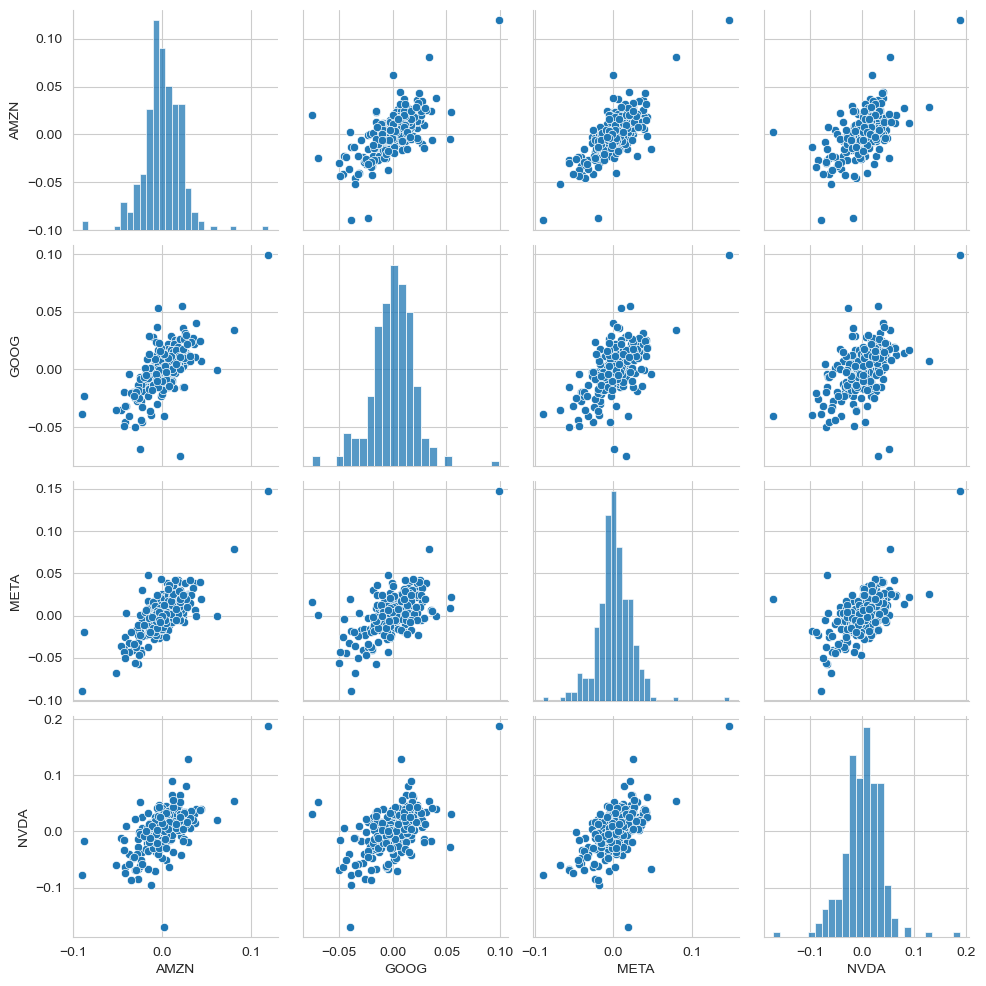

In [99]:
plt.show()

In [100]:
# more control of the figure

In [101]:
return_fig = sns.PairGrid(tech_returns.dropna())

In [102]:
# pass 3 method, mapp_upper, map_lower, map_diagonal
return_fig.map_upper(plt.scatter, color = "purple")

return_fig.map_lower(sns.kdeplot, cmap = "cool_d")

return_fig.map_diag(plt.hist, bins = 30)

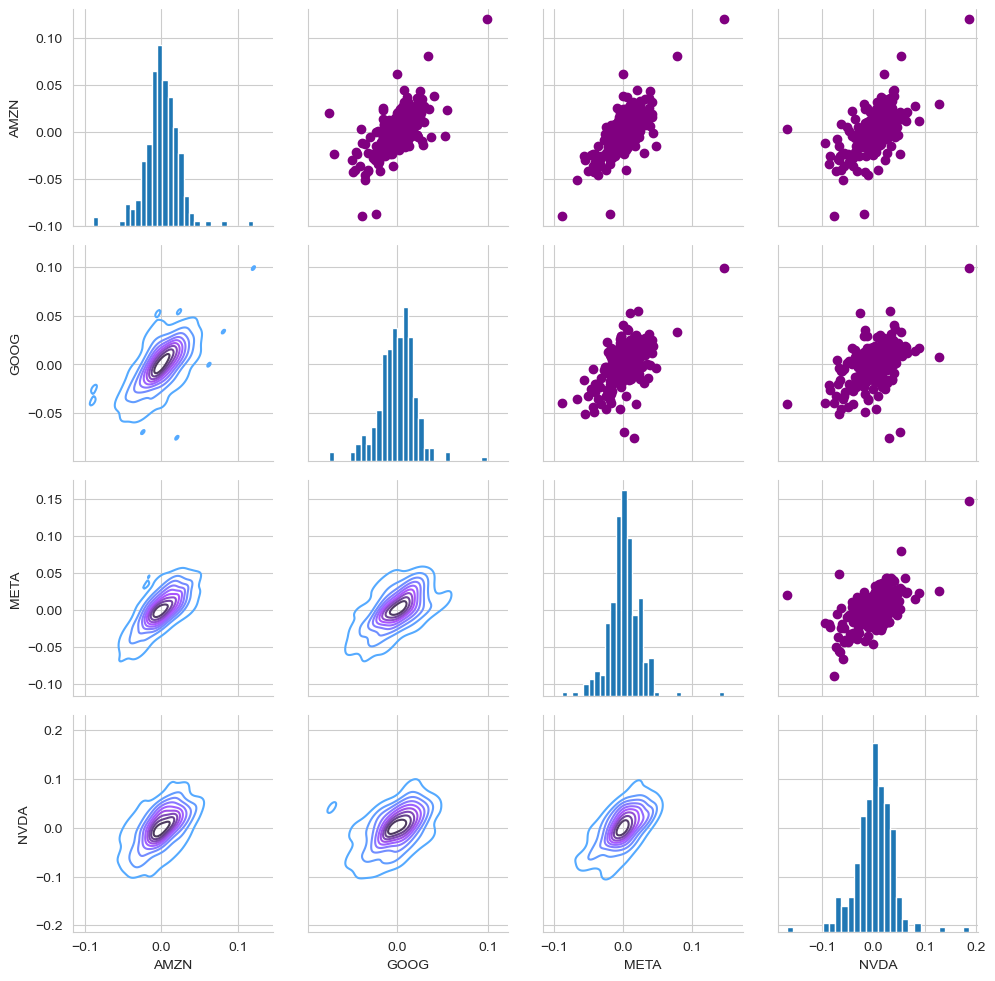

In [103]:
plt.show()

In [105]:
# Correlation plot for daily return

In [107]:
sns.heatmap(data = techy_df.dropna().corr(), annot = True)

<Axes: xlabel='Ticker', ylabel='Ticker'>

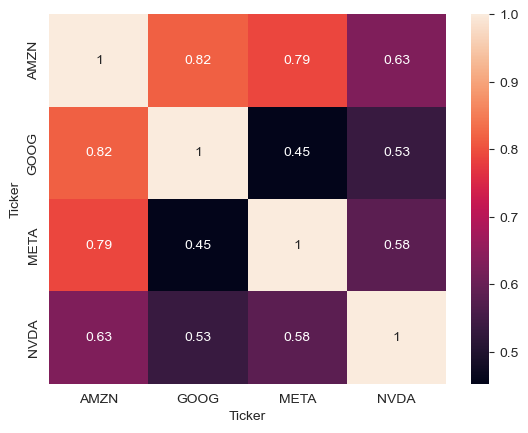

In [108]:
plt.show()

In [109]:
# use df with corr method
sns.heatmap(techy_df.dropna().corr(), cmap = "tab20", vmin = 0, vmax = 1, center = 0,
           square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .8})

<Axes: xlabel='Ticker', ylabel='Ticker'>

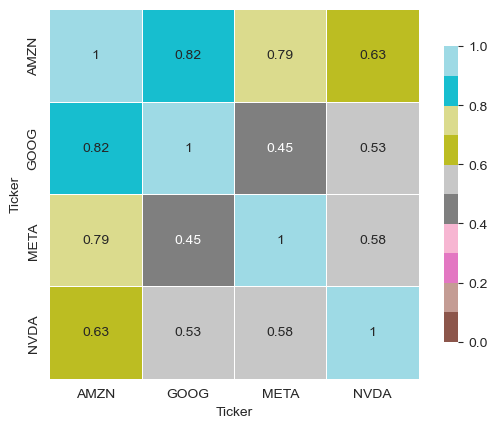

In [110]:
plt.show()

In [140]:
#  we have some significant numbers here, AMZN hold very good relationships with both GOOG and META with corr respectively are 0.82 and 0.79

# NVDA doing not bad when it has corr at 0.63

# Risk Analysis

In [111]:
# Quantify risk by comparing expected return with the std of daily returns, given we gathered on daily percentage returns data

In [112]:
# define a new dataframe

In [113]:
myreturns = tech_returns.dropna()

In [114]:
myreturns.describe()

Ticker,AMZN,GOOG,META,NVDA
count,248.000000,248.000000,248.000000,248.000000
mean,0.000698,0.000003,0.001517,0.001539
std,0.021846,0.020004,0.023285,0.036357
min,-0.089791,-0.075060,-0.089583,-0.169682
25%,-0.010212,-0.011374,-0.009722,-0.017632
50%,0.000219,0.000973,0.001484,0.003049
75%,0.013097,0.012126,0.013345,0.024368
max,0.119770,0.098786,0.147556,0.187227


In [115]:
# define the area of these circles for the scatter plot

In [116]:
area = np.pi * 25

In [117]:
plt.scatter(x = myreturns.mean(), y = myreturns.std(), s= area)

plt.xlabel("Expected Return")
plt.ylabel("Risk")

for label, x ,y in zip(myreturns.columns, myreturns.mean(), myreturns.std()):
    plt.annotate(label,
                 xy = (x,y), xytext = (50,50),
                 textcoords = 'offset points', ha = 'right', va = 'bottom',
                 arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=-0.3', color = "green"))

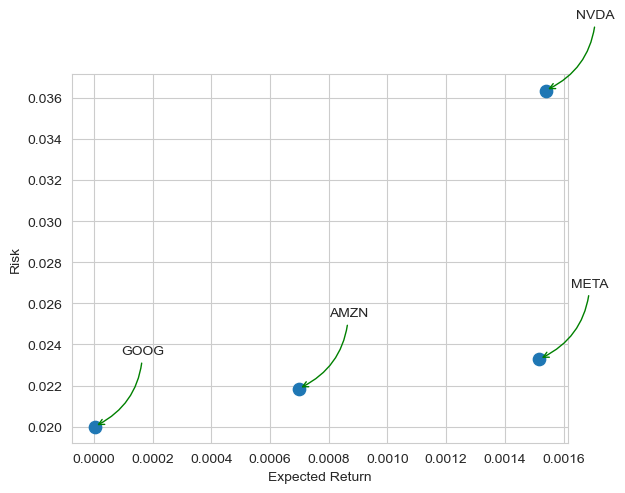

In [118]:
plt.show()

# Value at Risk

In [119]:
# define value at risk parameter for our stocks.

In [120]:
# the money we expected to lose/ putting at risk, for a given confidence interval

In [121]:
# Value at risk using the "bootstrap" method
sns.displot(data = NVDA["Daily Return Rate"].dropna(), bins = 100, color = "purple", kde = True)

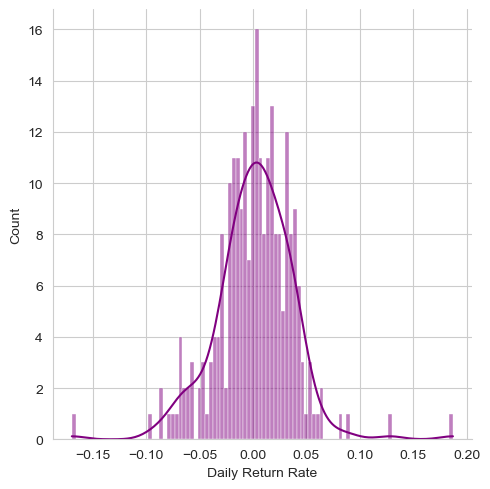

In [122]:
plt.show()

In [123]:
# use quantile to get the risk value of stocks

In [124]:
tech_returns.quantile(0.05)

Ticker
AMZN   -0.032075
GOOG   -0.035348
META   -0.037113
NVDA   -0.063085
Name: 0.05, dtype: float64

In [ ]:
# This is the 0.05 empirical quantile of daily return

# this means with 95% confidence that your worst daily loss would not exceed (n*100%)% 

# So everyday, at worst you would lose n% , 95% of the times

# So if you have $1 mill investment in AMZN, your 5% variance at worst would be $30,000, equilvalent to 5% = - 0,03

# Value at Risk using Monte Carlo Method

In [125]:
NVDA.head()

Price,Adj Close,Close,High,Low,Open,Volume,MA10,MA20,MA50,Daily Return Rate
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA,,,,
Date,,,,,,,,,,
2024-07-08,128.159500,128.199997,130.770004,127.040001,127.489998,237677300,NaN,NaN,NaN,NaN
2024-07-09,131.338516,131.380005,133.820007,128.649994,130.350006,285366600,NaN,NaN,NaN,0.024805
2024-07-10,134.867401,134.910004,135.100006,132.419998,134.029999,248978600,NaN,NaN,NaN,0.026869
2024-07-11,127.359764,127.400002,136.149994,127.050003,135.750000,374782700,NaN,NaN,NaN,-0.055667
2024-07-12,129.199203,129.240005,131.919998,127.220001,128.259995,252680500,NaN,NaN,NaN,0.014443


In [126]:
# set up the time horizon
days = 365
# set up delta
dt = 1/days
# set up and grab our "drift" from the expected return data for NVDA

mu = tech_returns.mean()["NVDA"]

# grab the volatility of the stock from the std of average return

sigma = tech_returns.std()["NVDA"]

In [127]:
# tech_returns.dropna()

In [128]:
# tech_returns.mean()

In [129]:
# creat a function that take in - inital stock price, the number of days you run for, your mu and your sigma

# mu is your average daily returns

# sigma is your std on those returns

def monte_carlo(start_price, days, mu, sigma):
    # Create 3 arrays - Price, Shock and Drift
    
    # 1: define a price array full of zeros with the length = numbers of the days
    price = np.zeros(days)
    # set the first term of price = starting price
    price[0] = start_price
    
    # 2:  make a shock & drift
    shock = np.zeros(days)
    drift = np.zeros(days)

    # 3: calculate the shock term for everyday
    for x in range(1,days):
        # Jose set epsilon equal a normal distribution defined by sigma*np.sqrt(dt) // based off the information from NVDA stock
        shock[x] = np.random.normal(loc = mu*dt, scale = sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        # price of stock = previous stock's price + Delta X_value /// current drift value + current shock value
        
        price[x] = price[x-1] +( price[x-1] * (drift[x] + shock[x]))
    
    return price

In [130]:
NVDA.head()

Price,Adj Close,Close,High,Low,Open,Volume,MA10,MA20,MA50,Daily Return Rate
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA,,,,
Date,,,,,,,,,,
2024-07-08,128.159500,128.199997,130.770004,127.040001,127.489998,237677300,NaN,NaN,NaN,NaN
2024-07-09,131.338516,131.380005,133.820007,128.649994,130.350006,285366600,NaN,NaN,NaN,0.024805
2024-07-10,134.867401,134.910004,135.100006,132.419998,134.029999,248978600,NaN,NaN,NaN,0.026869
2024-07-11,127.359764,127.400002,136.149994,127.050003,135.750000,374782700,NaN,NaN,NaN,-0.055667
2024-07-12,129.199203,129.240005,131.919998,127.220001,128.259995,252680500,NaN,NaN,NaN,0.014443


In [131]:
start_price = 128.15
# I will run this monte carlo simulation 10000 times
for run in range(10000):
    plt.plot(monte_carlo(start_price, days, mu, sigma))

plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Monte Carlo Analysis on NVDA")

Text(0.5, 1.0, 'Monte Carlo Analysis on NVDA')

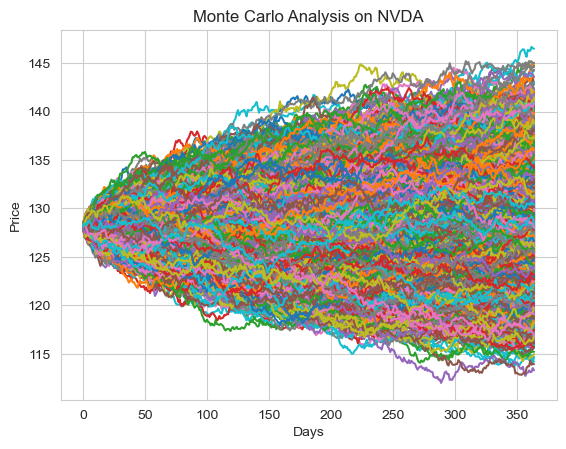

In [132]:
plt.show()

In [133]:
# this graph shows a year worth of random trial for NVDA's stock price

In [134]:
# I will create a histogram of the end-result to make it more understandable

# Note: Big guys in Wall Street do it million times of run and use much more complicated analysis.     :) you may get lucky <3

In [135]:
# set up run
runs = 10000
# create a new array 
simulations = np.zeros(runs)

# every run that point in the simulation is defined as the end price, we going to take this very last price point on the 365th day 

# and we gather an array of all these ending price points
for run in range(runs):
    simulations[run] = monte_carlo(start_price, days, mu, sigma)[days-1]

In [138]:
#Use Quantile to evaluate the risk for this stock

#We use Mumpy to define q as 1% empirical quantile, means that 99% of the values should fit within our output

In [136]:
q = np.percentile(simulations, 1)
# plot histogram
plt.hist(simulations, bins = 200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s= f"Start price: ${start_price:.2f}" )
# Mean ending price
plt.figtext(0.6, 0.7, f"Mean final price: ${simulations.mean():.2f}" )

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, f"VaR(0.99): ${(start_price - q):.2f}" )

# Display 1% quantile
plt.figtext(0.15, 0.6, f"q(0.99): ${q:.2f}" )

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for NVDA Stock after %s days" % days, weight='bold');

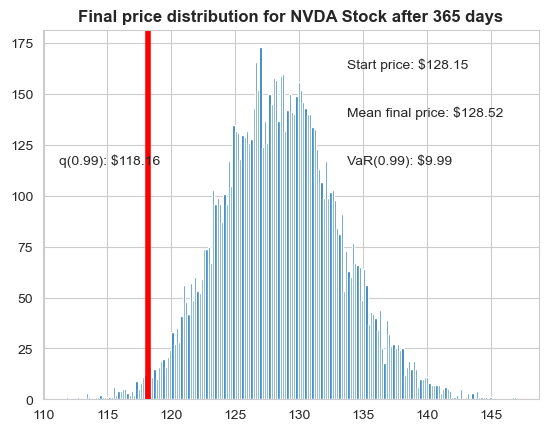

In [137]:
plt.show()

In [139]:
# We can see that our start is $128.15 while our average final price is $128.52, it is a pretty stable stock. 

# If you look at the risk-expected return graph, the expected return is 0.0015 which explained why our mean final price is so close to starting price.

# *Risks: 

# (Red Line) = 1% quantile result, indicates the value at risk for each NVDA stock is gonna be $9.99

# 99% of the time that you run this monte carlo simulation, the amount of money you would lose at most, 99% of the time is nearly $10 (over a year).